In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing(as_frame=True)
### When data frame is true it will return the data as pandas data frame instead of numpy array
 

In [ ]:
housing_df = data.frame


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
numerical_features = housing_df.select_dtypes(include=[np.number]).columns
### select_dtypes() is a Pandas method used to filter columns based on their data type.
### The parameter include=[np.number] ensures that only columns with numeric data types (e.g., int, float) are selected.
# The .columns attribute extracts only the column names from the filtered DataFrame.
numerical_features

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

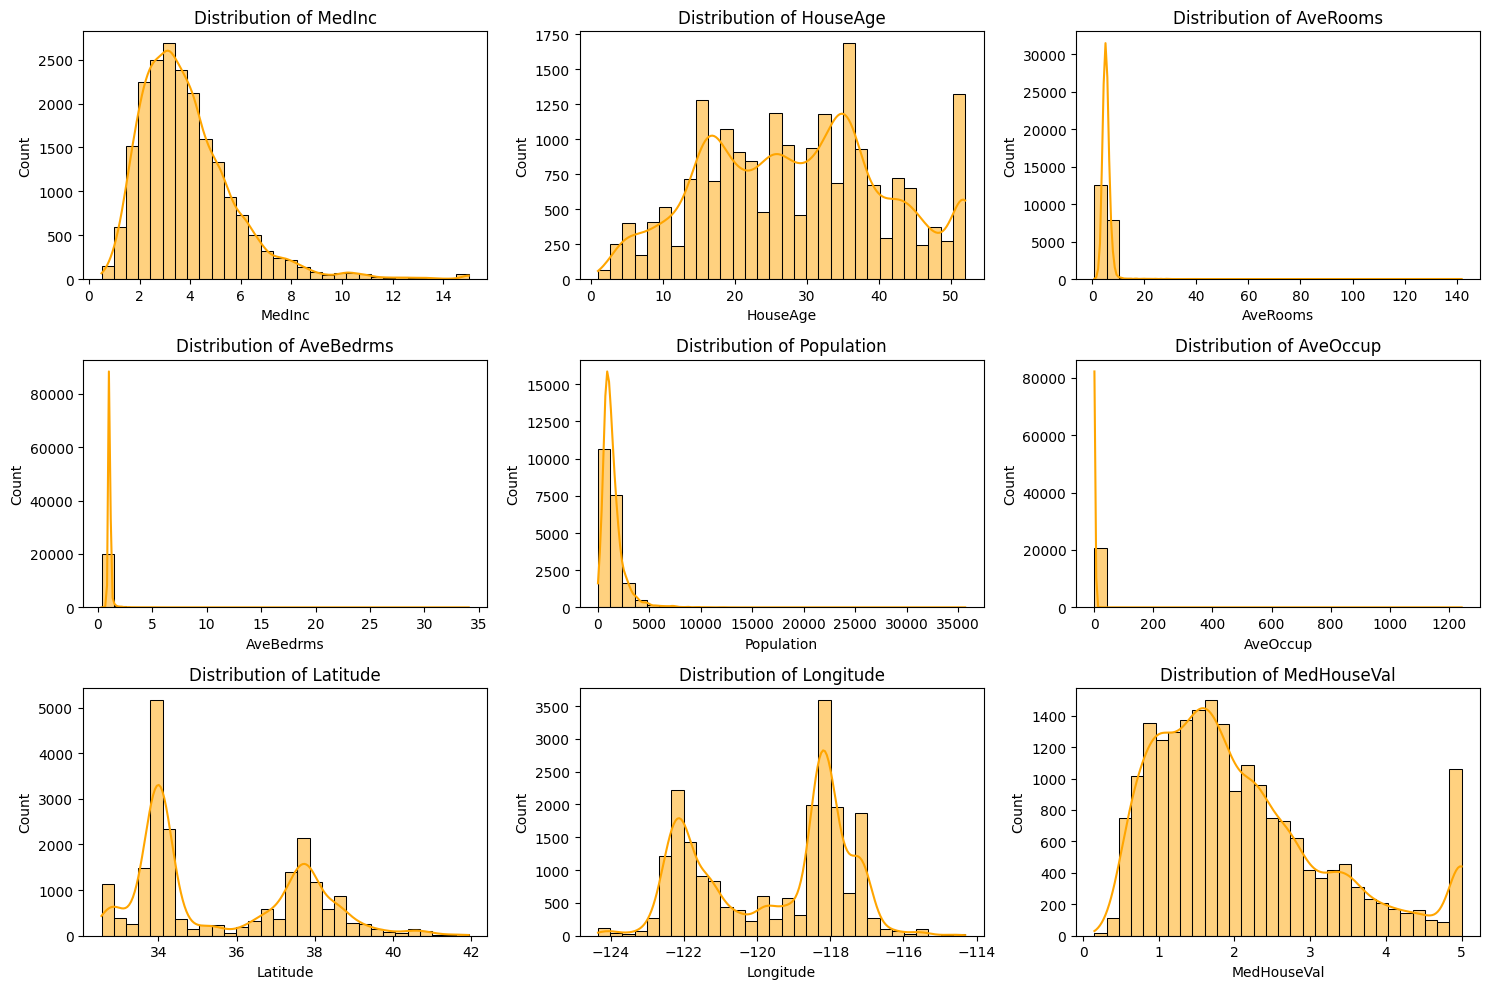

In [6]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(housing_df[feature], kde=True, bins=30, color='orange')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

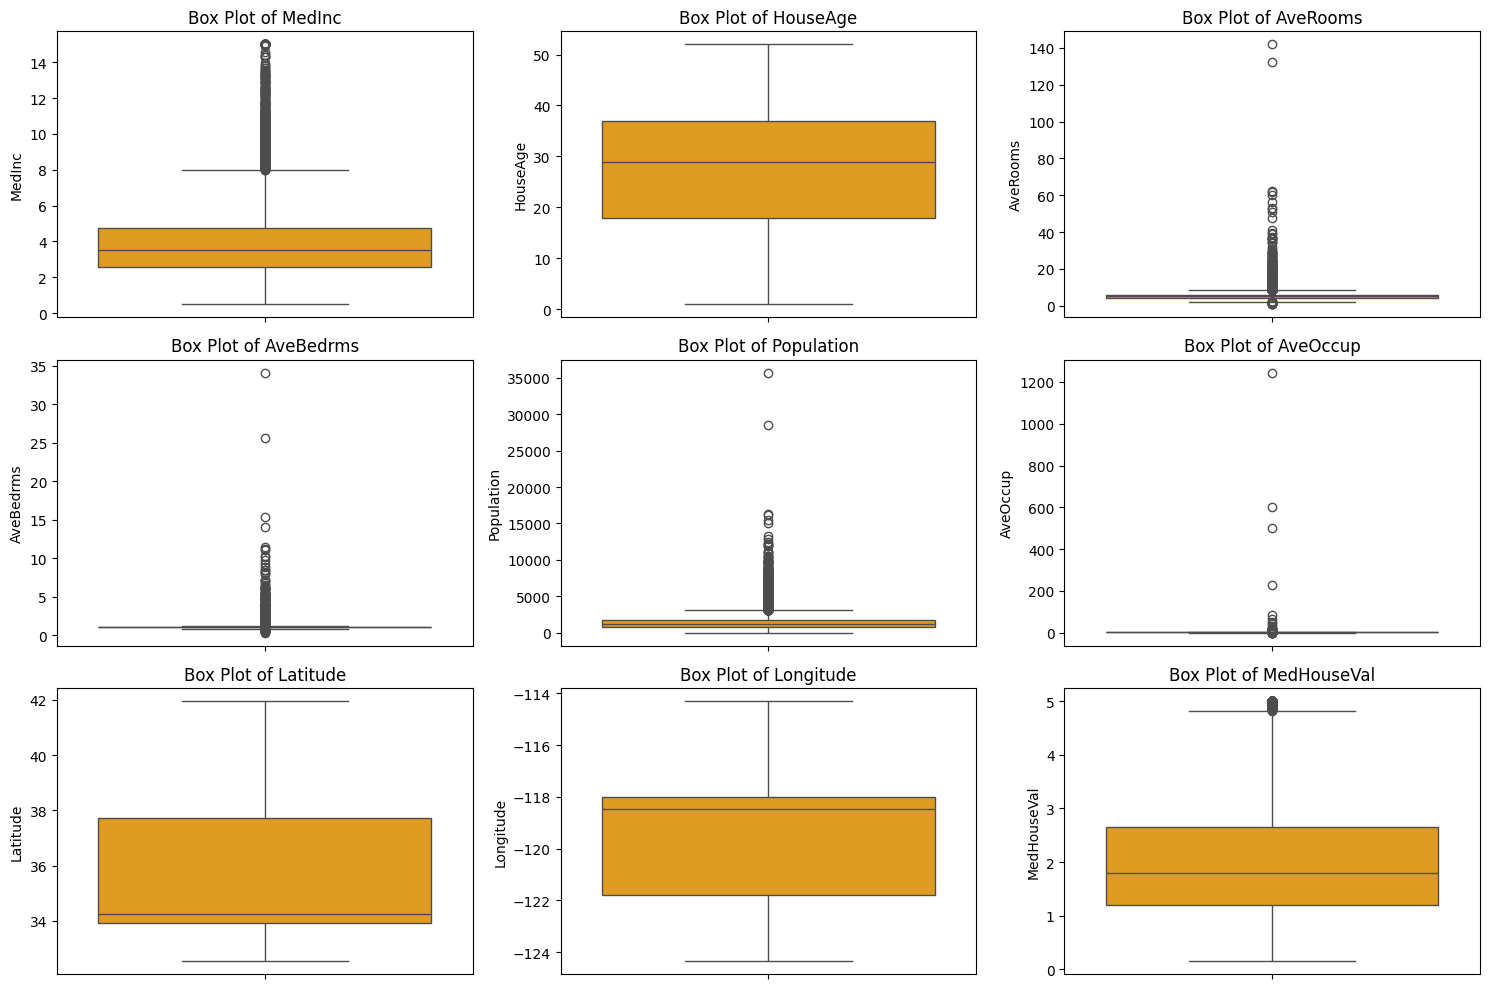

In [7]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(housing_df[feature], color='orange')
    plt.title(f"Box Plot of {feature}")
plt.tight_layout()
plt.show()

In [ ]:

# pd.set_option('display.max_columns',None)
print("Outliers Detection:")
# outliers_summary = {}
for feature in numerical_features:
    Q1 = housing_df[feature].quantile(0.25)
    Q3 = housing_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = housing_df[(housing_df[feature] < lower_bound) | (housing_df[feature] > upper_bound)]
    # outliers_summary[feature] = len(outliers)
    print(f"{feature} : {len(outliers)} outliters")

print("\nDataSet Summary : ")
print(housing_df.describe())


Outliers Detection:
MedInc : 681 outliters
HouseAge : 0 outliters
AveRooms : 511 outliters
AveBedrms : 1424 outliters
Population : 1196 outliters
AveOccup : 711 outliters
Latitude : 0 outliters
Longitude : 0 outliters
MedHouseVal : 1071 outliters

DataSet Summary : 
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup  